# Laboratorium 1


### Konfiguracja

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [3]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


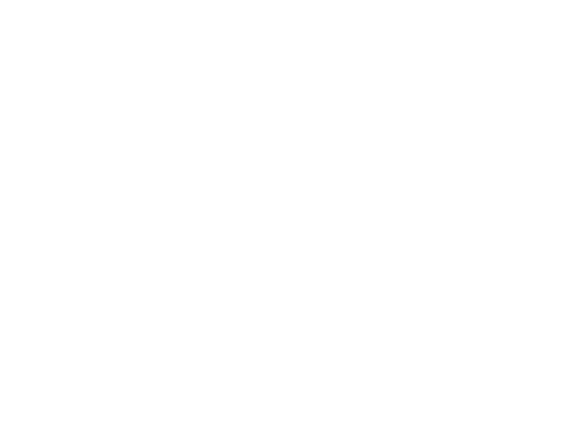

In [4]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [5]:
%matplotlib notebook

import random
import math


def get_rand_points(how_many=100, lower_bound=0, upper_bound=100):
    random_points = []
    for i in range(how_many):
        x = random.uniform(lower_bound, upper_bound)
        y = random.uniform(lower_bound, upper_bound)
        p = (x, y)
        random_points.append(p)
    return random_points


def get_rand_points_circle(how_many=100, radius=1, center=(0, 0)):
    random_points = []
    for i in range(how_many):
        angle = random.uniform(0, 2 * math.pi)
        x = radius * math.cos(angle) + center[0]
        y = radius * math.sin(angle) + center[1]
        p = (x, y)
        random_points.append(p)
    return random_points


def get_rand_points_line(how_many=100, a=(0, 0), b=(1, 1), lower_bound=0,
                         upper_bound=100):
    v = (b[0] - a[0], b[1] - a[1])
    random_points = []

    if abs(v[1]) > abs(v[0]):
        for i in range(how_many):
            x = random.uniform(lower_bound, upper_bound)
            y = v[0] / v[1] * x
            p = (x, y)
            random_points.append(p)
    else:
        for i in range(how_many):
            y = random.uniform(lower_bound, upper_bound)
            x = v[1] / v[0] * y
            p = (x, y)
            random_points.append(p)

    return random_points

### Reprezentacja zbiorów punktów

<IPython.core.display.Javascript object>


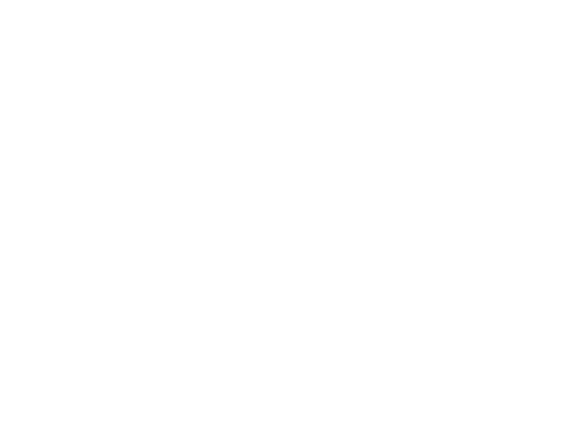

In [6]:
# First random points collection
how_many = 10 ** 5
lower_bound = -1000
upper_bound = -lower_bound

plot = Plot([PointsCollection(get_rand_points(how_many, lower_bound, upper_bound))])
            
plot.draw()

<IPython.core.display.Javascript object>


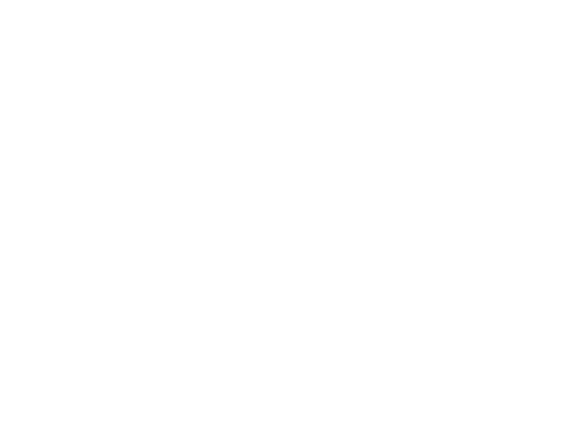

In [7]:
# Second
how_many = 10 ** 5
lower_bound = -10 ** 14
upper_bound = -lower_bound

plot = Plot([PointsCollection(get_rand_points(how_many, lower_bound, upper_bound))])
            
plot.draw()

<IPython.core.display.Javascript object>


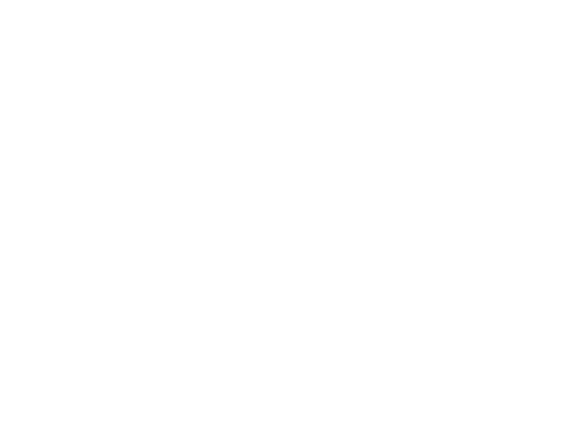

In [8]:
# Points on a circle
how_many = 1000
radius = 100

plot = Plot([PointsCollection(get_rand_points_circle(how_many, radius))])
            
plot.draw()

<IPython.core.display.Javascript object>


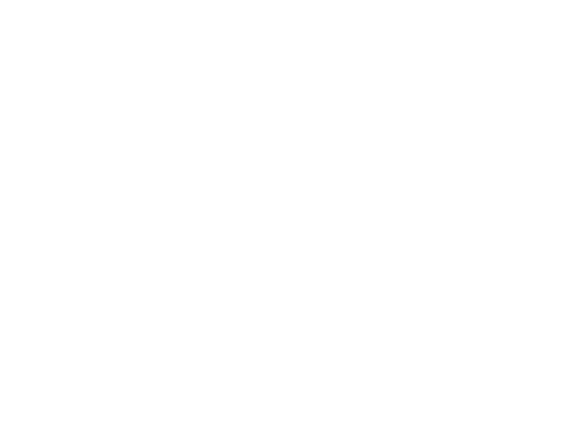

In [9]:
# Points on a line
how_many = 10 ** 5
lower_bound = -1000
upper_bound = -lower_bound
a = (-1, 0)
b = (1, 0.1)

plot = Plot([PointsCollection(get_rand_points_line(how_many, a, b, lower_bound, upper_bound))])
            
plot.draw()

### Reprezentacja różnicy w podziale punktów

In [10]:
def get_sign(a, error=10 ** (-5)):
    if a > error:
        return 1
    elif a < -error:
        return -1
    else:
        return 0


def calc_det_sign1(a, b, c, error=10 ** (-5)):
    temp = np.array([[a[0], a[1], 1],
                     [b[0], b[1], 1],
                     [c[0], c[1], 1]])

    result = np.linalg.det(temp)
    return get_sign(result, error)


def calc_det_sign2(a, b, c, error=10 ** (-5)):
    temp = np.array([[(a[0] - c[0]), (a[1] - c[1])],
                     [(b[0] - c[0]), (b[1] - c[1])]])

    result = np.linalg.det(temp)
    return get_sign(result, error)


def how_many_different_result(c_points, a=(0, 0), b=(1, 1), error=10 ** (-5)):
    result = []
    for c in c_points:
        sign1 = calc_det_sign1(a, b, c)
        sign2 = calc_det_sign2(a, b, c)
        if sign1 != sign2:
            result.append(c)
    return result


def get_points_classification(c_points, a=(0, 0), b=(1, 1), error=10 ** (-5)):
    left = []
    right = []
    collinear = []

    for point in c_points:
        if calc_det_sign1(a, b, point, error) == 1:
            left.append(point)
        elif calc_det_sign1(a, b, point, error) == -1:
            right.append(point)
        else:
            collinear.append(point)
            
    result = [PointsCollection(left, color = "green"),
            PointsCollection(right, color = "blue"),
            PointsCollection(collinear, color = "red")]
    return result
    

<IPython.core.display.Javascript object>


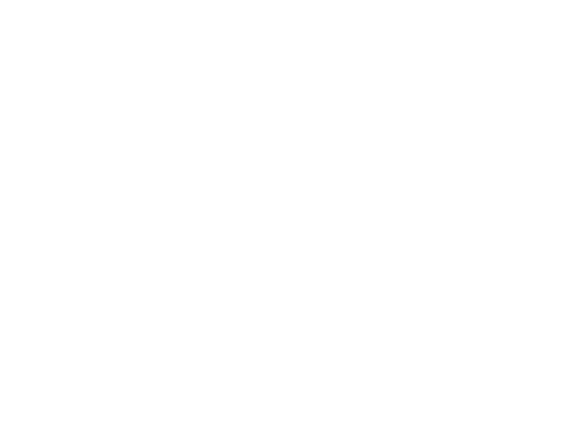

In [11]:
# First random points collection
how_many = 10 ** 5
lower_bound = -1000
upper_bound = -lower_bound
a = (0, 0)
b = (1, 1)
error = 2

random_points = get_rand_points(how_many, lower_bound, upper_bound)

points_collection = get_points_classification(random_points, a, b, error)

plot = Plot(points_collection)
            
plot.draw()

<IPython.core.display.Javascript object>


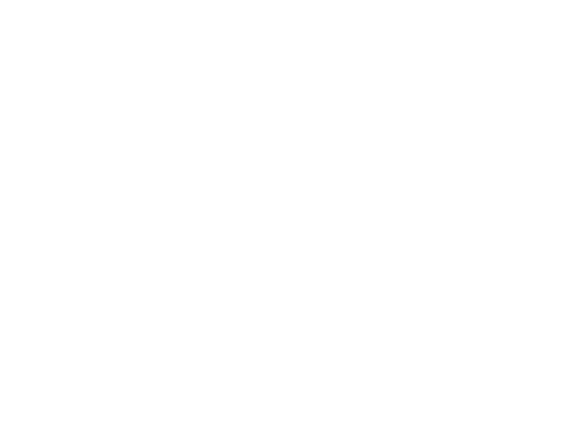

In [12]:
# Second
how_many = 10 ** 5
lower_bound = -10 ** (14)
upper_bound = -lower_bound
a = (0, 0)
b = (1, 1)
error = 10 ** (10)

random_points = get_rand_points(how_many, lower_bound, upper_bound)

points_collection = get_points_classification(random_points, a, b, error)

plot = Plot(points_collection)
            
plot.draw()

<IPython.core.display.Javascript object>


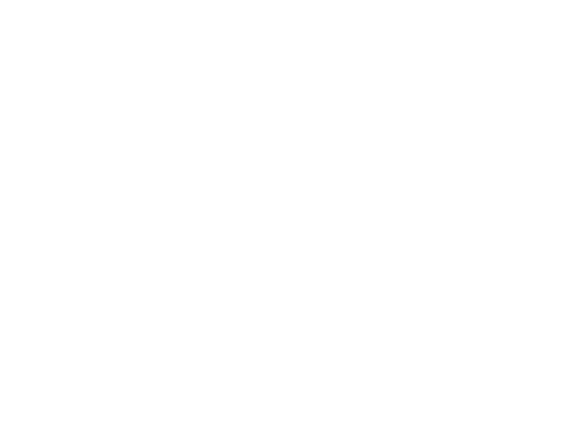

In [13]:
# Points on a circle
how_many = 1000
radius = 100
a = (0, 0)
b = (1, 1)
error = 2

random_points = get_rand_points_circle(how_many, radius)

points_collection = get_points_classification(random_points, a, b, error)

plot = Plot(points_collection)
            
plot.draw()

<IPython.core.display.Javascript object>


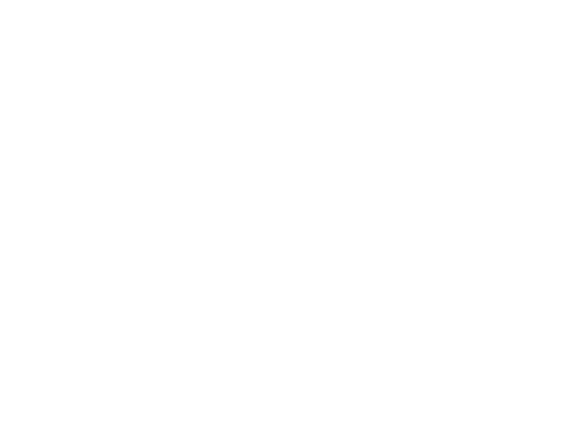

In [14]:
# Points on a line
how_many = 10 ** 5
lower_bound = -1000
upper_bound = -lower_bound
a = (-1, 0)
b = (1, 0.1)

error = 10

random_points = get_rand_points_line(how_many, a, b, lower_bound, upper_bound)

points_collection = get_points_classification(random_points, a, b, error)

plot = Plot(points_collection)
            
plot.draw()


<IPython.core.display.Javascript object>


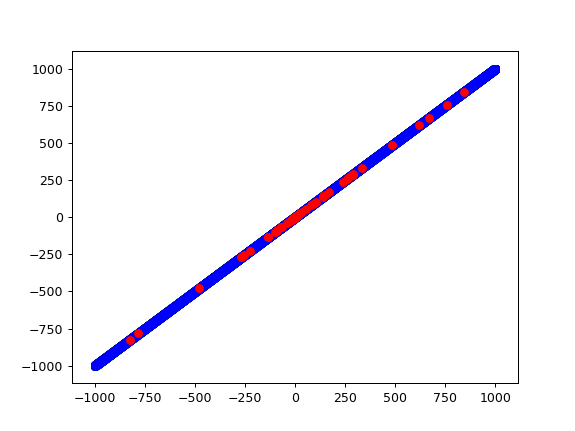

In [15]:
# Points on a line y = x with changed error
how_many = 10 ** 5
lower_bound = -1000
upper_bound = -lower_bound
a = (0, 0)
b = (1, 1)

error = 10 ** (-17)

random_points = get_rand_points_line(how_many, a, b, lower_bound, upper_bound)

points_collection = get_points_classification(random_points, a, b, error)

plot = Plot(points_collection)
            
plot.draw()